In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Function_Solver import solver_para, solver_run

Generate .png of solution

In [67]:
tau = 1/10
epsilon = 1/50
num_steps = 1000
nx = 100
ny = 100
alpha = -1

V, u, v, u_n, f, u_D, bc, mesh = solver_para(nx,ny,tau)

solutions = solver_run(alpha, V, u, v, u_n, f, u_D, bc, epsilon, num_steps)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

In [63]:
def coarsen(coarse, u_array):
    
    coarse_inv = int(100/coarse)
    u_array_coarse = np.zeros((coarse, coarse))
    for i in range(coarse):
        for j in range(coarse):
            u_sum = 0
            for ki in range(coarse_inv):
                for kj in range(coarse_inv):
                    u_sum += u_array[101%coarse + i*coarse_inv + ki, j*coarse_inv + kj]
            u_array_coarse[i,j] = u_sum / (coarse_inv ** 2)
    
    return u_array_coarse
                    

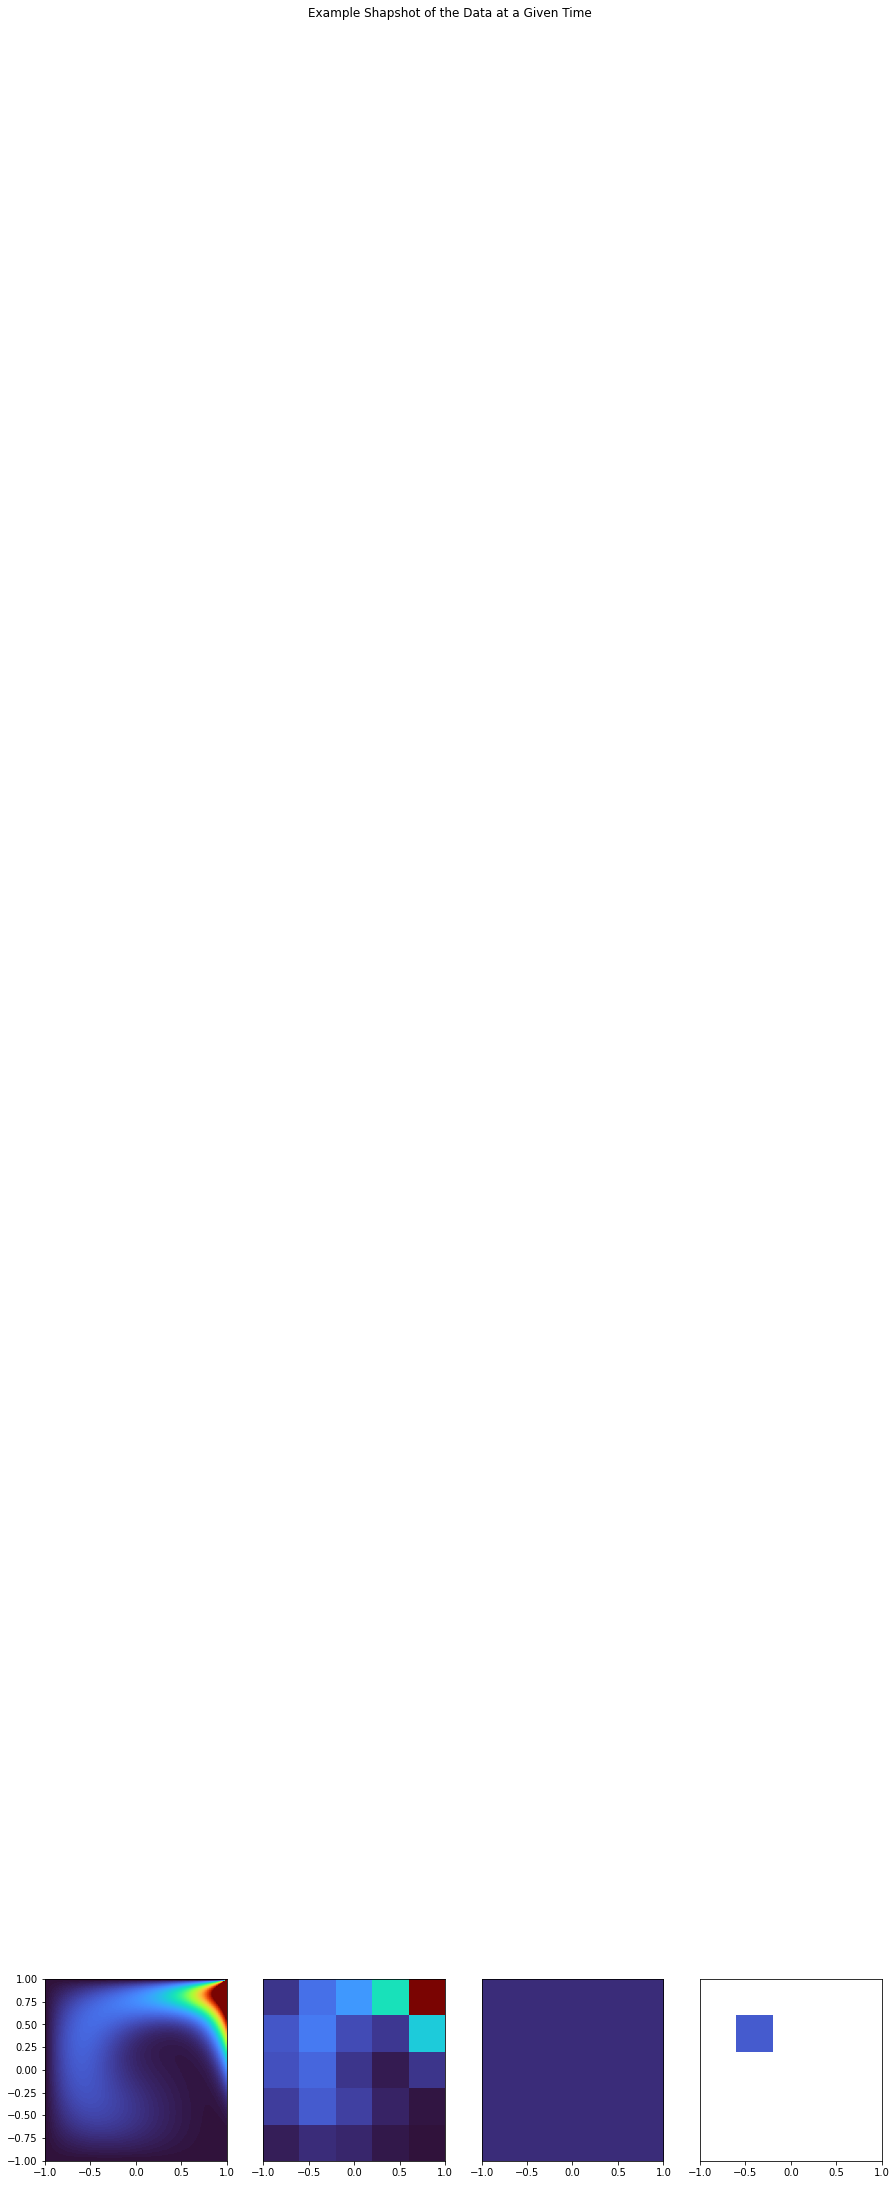

In [82]:
u_approx = np.array(solutions[700].compute_vertex_values(mesh))
u_list = []
for i in range(101):
    u_list.append(u_approx[i*101:(i+1)*101])

u_array = np.array(u_list)

coarse_1 = 10
coarse_2 = 5
coarse_3 = 1

coarse_array_unknown = np.empty((coarse_2, coarse_2))
coarse_array_unknown[:] = np.NaN
coarse_array_unknown[1,1] = coarsen(coarse_2, u_array)[2,2]

fig, ax = plt.subplots(1,4,figsize=(15,60))

ax[0].imshow(u_array, 'turbo', extent=[-1,1,-1,1], vmin=0, vmax=3)
ax[1].imshow(coarsen(coarse_2, u_array), 'turbo', extent=[-1,1,-1,1])
ax[2].imshow(coarsen(coarse_3, u_array), 'turbo', extent=[-1,1,-1,1], vmin = 0, vmax=7)
ax[3].imshow(coarse_array_unknown, 'turbo', extent=[-1,1,-1,1],interpolation='nearest', vmin=0, vmax=1)

ax[1].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
ax[2].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
ax[3].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off



In [57]:
print(coarse_array_unknown)

[[0.         0.         0.         0.         0.        ]
 [0.         0.00016183 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
